In [1]:
# importer les packages
# prendre en charge les tableaux multidimentionnels
import numpy as np
import scipy.stats as st
# visualiser les données
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
# analyse de données
import pandas as pd
# rendre les graphiques statistiques matplotlib plus esthetique
import seaborn as sns
# apprentissage automatique
import sklearn
from sklearn.preprocessing import LabelEncoder
from wordcloud import WordCloud, STOPWORDS
from PIL import Image

# charger la base de données à analyser

In [2]:
# import de l'échantillon
data = pd.read_csv("data_new_to_analyse_median.csv")

In [3]:
data.head()

,energy_100g,sugars_100g,carbohydrates_100g,fat_100g,saturated-fat_100g,fiber_100g,proteins_100g,fruits-vegetables-nuts_100g,salt_100g,nutriscore_score,energy_cal,nutri_sum,pnns_groups_1,nutriscore_grade
0,1569.0,15.0,70.1,7.0,3.08,1.7,7.8,25.0,1.40,10.0,1597.3,84.9,Sugary snacks,d
1,936.0,22.0,29.0,8.2,2.20,0.0,5.1,25.0,4.60,18.0,899.5,42.3,Fat and sauces,d
2,88.0,0.4,4.8,0.0,0.00,1.7,0.2,25.0,2.04,10.0,85.0,5.0,Sugary snacks,d
3,251.0,3.0,10.0,3.0,1.00,1.7,2.0,25.0,1.15,10.0,321.0,15.0,Sugary snacks,d
4,264.0,15.5,15.5,0.0,0.00,1.7,0.2,25.0,0.00,10.0,266.9,15.7,Sugary snacks,d


In [4]:
df=data.copy()

In [5]:
#dimension de la base de données
df.shape

(995953, 14)

In [6]:
df.describe()

,energy_100g,sugars_100g,carbohydrates_100g,fat_100g,saturated-fat_100g,fiber_100g,proteins_100g,fruits-vegetables-nuts_100g,salt_100g,nutriscore_score,energy_cal,nutri_sum
count,995953.000000,995953.000000,995953.000000,995953.000000,995953.000000,995953.000000,995953.000000,995953.000000,995953.000000,995953.000000,995953.000000,995953.000000
mean,1133.919190,13.769628,29.541829,12.961980,4.833132,2.178515,8.442193,25.079750,1.249753,9.675507,1151.245609,50.946002
std,742.768818,19.008086,27.129755,15.157617,7.045046,2.956927,9.513054,3.251695,3.817599,6.170536,752.842406,31.184036
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-15.000000,0.000000,0.000000
25%,460.000000,1.000000,5.000000,1.000000,0.200000,1.700000,1.900000,25.000000,0.100000,10.000000,470.700000,22.400000
50%,1090.000000,4.300000,19.000000,7.300000,1.900000,1.700000,6.000000,25.000000,0.600000,10.000000,1106.500000,47.500000
75%,1674.000000,20.000000,53.800000,21.000000,6.700000,1.700000,11.700000,25.000000,1.300000,10.000000,1695.000000,83.600000
max,3494.000000,100.000000,100.000000,94.100000,100.000000,100.000000,100.000000,100.000000,100.000000,40.000000,3699.900000,100.000000


# a rappeler: pour les categories  le codage
#'Beverages:0','Cereals and potatoes:1','Composite foods:2','Fat and sauces:3','Fish Meat Eggs:4',
#'Fruits and vegetables:5','Milk and dairy products:6','Salty snacks:7',Sugary snacks:8',
#et pour le nutriscore:
#'a':1,'b':2,'c':3, 'd':4, 'e':5

# Analyse univariée

# Variables Quantitatives

In [7]:
# distributions des variables quantitatives avec calcul d'indicateurs de dispersion et indicateurs de forme

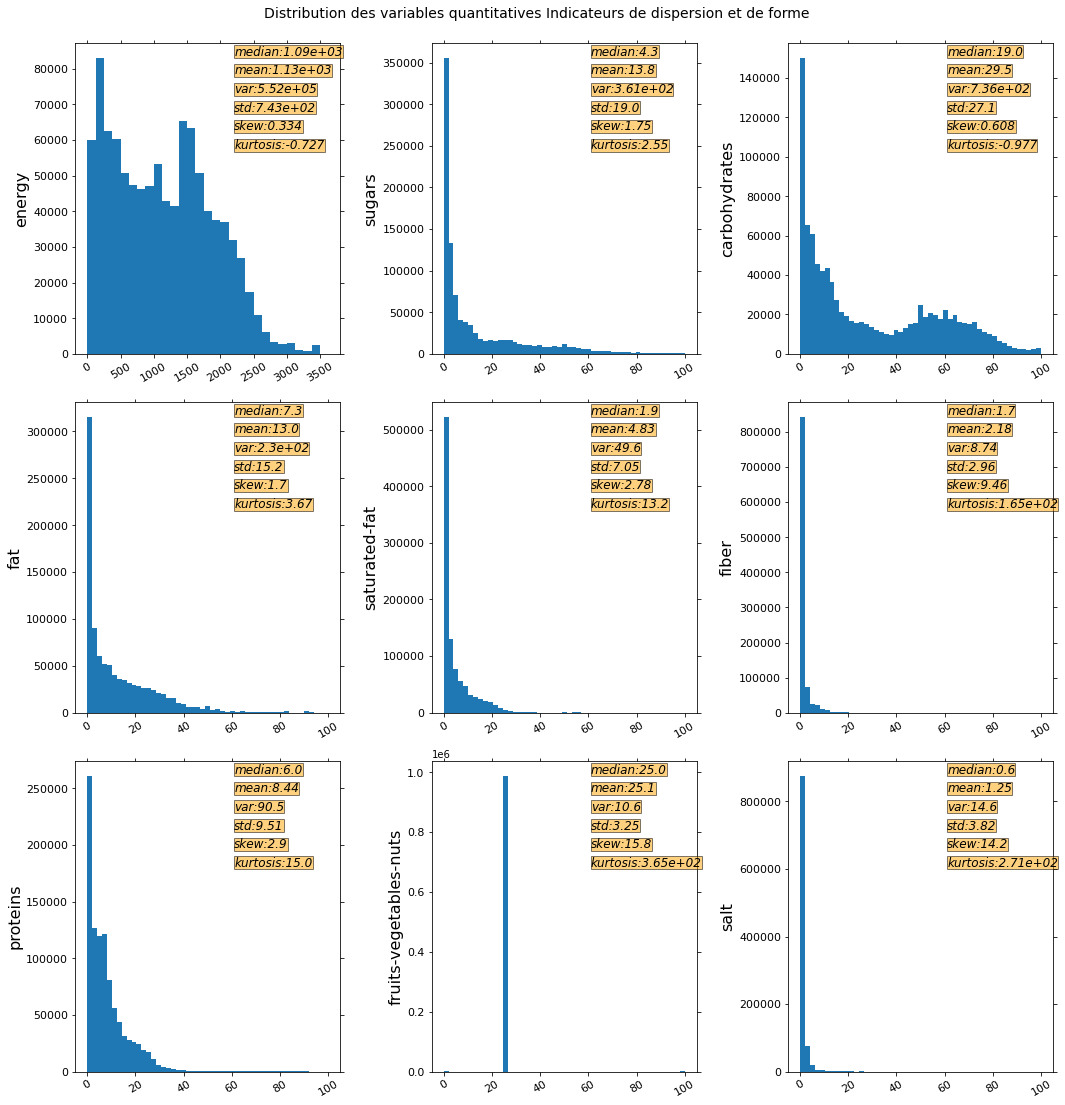

In [8]:
tPlot, axes = plt.subplots(nrows=3, ncols=3, sharex=False, sharey=False, figsize=(15,15))
axes = np.array(axes)

i=0
for ax in axes.reshape(-1):
    colonne = df.columns[i]
    
    mean_2 = df[pd.notnull(df[colonne])][colonne].mean()
    median_2 = df[pd.notnull(df[colonne])][colonne].median()
    var_2 = df[pd.notnull(df[colonne])][colonne].var()
    std_2 = df[pd.notnull(df[colonne])][colonne].std()
    skew_2 = df[pd.notnull(df[colonne])][colonne].skew()
    kurtosis_2 = df[pd.notnull(df[colonne])][colonne].kurtosis()


    test = df[pd.notnull(df[colonne])][colonne]  
    ax.set_ylabel(colonne.rstrip("_100g"), fontsize = 16)
    ax.tick_params(labelcolor='black', top='off', bottom='on', left='on',
                   right='off', labelsize = 11)
    for tick in ax.get_xticklabels():
        tick.set_rotation(30)
    
    if   i == 1: ax.hist(test, bins=np.linspace(0,100,50))
    elif i == 0: ax.hist(test, bins=range(0,3700,125))
    elif i == 2: ax.hist(test, bins=np.linspace(0,100,50))
    elif i == 3: ax.hist(test, bins=np.linspace(0,100,50))
    elif i == 4: ax.hist(test, bins=np.linspace(0,100,50))
    elif i == 5: ax.hist(test, bins=np.linspace(0,100,50))
    elif i == 6: ax.hist(test, bins=np.linspace(0,100,50))
    elif i == 7: ax.hist(test, bins=np.linspace(0,100,50))
    elif i == 8: ax.hist(test, bins=np.linspace(0,100,50))
    elif i == 9: ax.hist(test, bins=np.linspace(0,40,50))
    elif i == 10: ax.hist(test, bins=np.linspace(0,3700,50))
    elif i == 11: ax.hist(test, bins=np.linspace(0,100,40))
            
    ax.text(0.6, 0.90, 'mean:{:.3}'.format(mean_2), style='italic', fontsize = 12,
            transform=ax.transAxes, bbox={'facecolor':'orange','alpha':0.5,'pad':0})
    ax.text(0.6, 0.96, 'median:{:.3}'.format(median_2), style='italic', fontsize = 12,
            transform=ax.transAxes, bbox={'facecolor':'orange','alpha':0.5,'pad':0})
    ax.text(0.6, 0.84, 'var:{:.3}'.format(var_2), style='italic', fontsize = 12,
            transform=ax.transAxes, bbox={'facecolor':'orange','alpha':0.5,'pad':0})
    ax.text(0.6, 0.78, 'std:{:.3}'.format(std_2), style='italic', fontsize = 12,
            transform=ax.transAxes, bbox={'facecolor':'orange','alpha':0.5,'pad':0})
    ax.text(0.6, 0.72, 'skew:{:.3}'.format(skew_2), style='italic', fontsize = 12,
            transform=ax.transAxes, bbox={'facecolor':'orange','alpha':0.5,'pad':0})
    ax.text(0.6, 0.66, 'kurtosis:{:.3}'.format(kurtosis_2), style='italic', fontsize = 12,
            transform=ax.transAxes, bbox={'facecolor':'orange','alpha':0.5,'pad':0})


    i += 1
    
    
tPlot.text(0.5, 1.01, "Distribution des variables quantitatives Indicateurs de dispersion et de forme", ha='center', fontsize = 14)
plt.tight_layout()


# variables Qualitatives

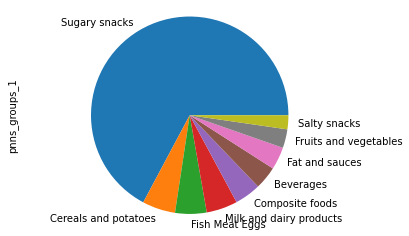

In [9]:
import matplotlib.pyplot as plt

# VARIABLE QUALITATIVE:pnns_groups_1
# Diagramme en secteurs
df["pnns_groups_1"].value_counts().plot(kind='pie')
plt.axis('equal') 
plt.show()

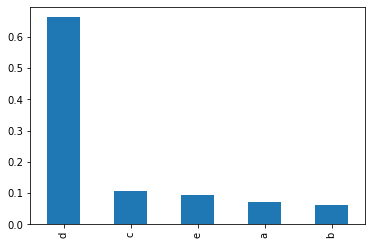

In [10]:
# Diagramme en tuyaux d'orgues :nutriscore_grade
df["nutriscore_grade"].value_counts(normalize=True).plot(kind='bar')
plt.show()

# Analyse bivariée

# variables quantitatives

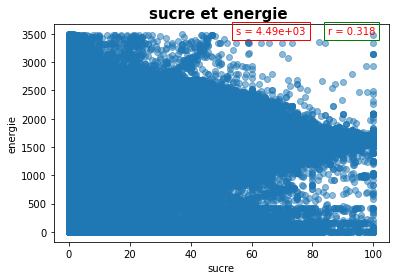

In [11]:
#sucre, energie et indicateurs de dispersion
plt.plot(df["sugars_100g"],df["energy_100g"],'o',alpha=0.5)
plt.xlabel("sucre")
plt.ylabel("energie")
plt.title("sucre et energie ", 
          weight='bold', 
          fontsize=15)
r=st.pearsonr(df["sugars_100g"],df["energy_100g"])[0]
s=np.cov(df["sugars_100g"],df["energy_100g"],ddof=0)[1,0]

plt.text(55, 3500, 's = {:.3}'.format(s), color='red', 
        bbox=dict(facecolor='none', edgecolor='red'))

plt.text(85,3500 , 'r = {:.3}'.format(r), color='red', 
        bbox=dict(facecolor='none', edgecolor='green'))

plt.show()

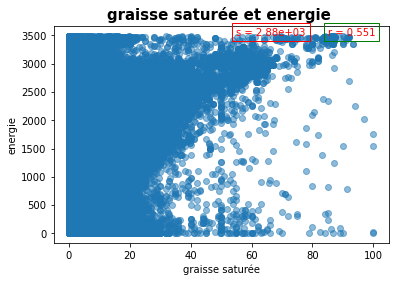

In [12]:
#graisse saturée, energie et indicateurs de dispersion
plt.plot(df["saturated-fat_100g"],df["energy_100g"],'o',alpha=0.5)
plt.xlabel("graisse saturée")
plt.ylabel("energie")
plt.title("graisse saturée et energie ", 
          weight='bold', 
          fontsize=15)
r=st.pearsonr(df["saturated-fat_100g"],df["energy_100g"])[0]
s=np.cov(df["saturated-fat_100g"],df["energy_100g"],ddof=0)[1,0]

plt.text(55, 3500, 's = {:.3}'.format(s), color='red', 
        bbox=dict(facecolor='none', edgecolor='red'))

plt.text(85,3500 , 'r = {:.3}'.format(r), color='red', 
        bbox=dict(facecolor='none', edgecolor='green'))

plt.show()

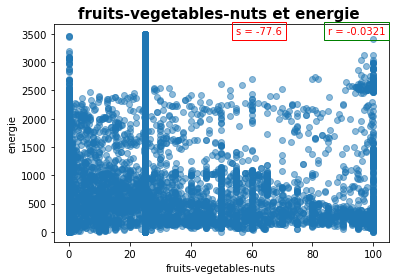

In [13]:
#graisse saturée, energie et indicateurs de dispersion
plt.plot(df["fruits-vegetables-nuts_100g"],df["energy_100g"],'o',alpha=0.5)
plt.xlabel("fruits-vegetables-nuts")
plt.ylabel("energie")
plt.title("fruits-vegetables-nuts et energie ", 
          weight='bold', 
          fontsize=15)
r=st.pearsonr(df["fruits-vegetables-nuts_100g"],df["energy_100g"])[0]
s=np.cov(df["fruits-vegetables-nuts_100g"],df["energy_100g"],ddof=0)[1,0]

plt.text(55, 3500, 's = {:.3}'.format(s), color='red', 
        bbox=dict(facecolor='none', edgecolor='red'))

plt.text(85,3500 , 'r = {:.3}'.format(r), color='red', 
        bbox=dict(facecolor='none', edgecolor='green'))

plt.show()

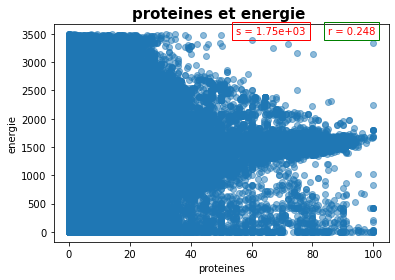

In [14]:
#proteines, energie et indicateurs de dispersion
plt.plot(df["proteins_100g"],df["energy_100g"],'o',alpha=0.5)
plt.xlabel("proteines")
plt.ylabel("energie")
plt.title("proteines et energie ", 
          weight='bold', 
          fontsize=15)
r=st.pearsonr(df["proteins_100g"],df["energy_100g"])[0]
s=np.cov(df["proteins_100g"],df["energy_100g"],ddof=0)[1,0]

plt.text(55, 3500, 's = {:.3}'.format(s), color='red', 
        bbox=dict(facecolor='none', edgecolor='red'))

plt.text(85,3500 , 'r = {:.3}'.format(r), color='red', 
        bbox=dict(facecolor='none', edgecolor='green'))

plt.show()

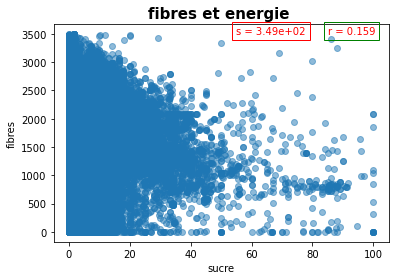

In [15]:
#fibres, energie et indicateurs de dispersion
plt.plot(df["fiber_100g"],df["energy_100g"],'o',alpha=0.5)
plt.xlabel("sucre")
plt.ylabel("fibres")
plt.title("fibres et energie ", 
          weight='bold', 
          fontsize=15)
r=st.pearsonr(df["fiber_100g"],df["energy_100g"])[0]
s=np.cov(df["fiber_100g"],df["energy_100g"],ddof=0)[1,0]

plt.text(55, 3500, 's = {:.3}'.format(s), color='red', 
        bbox=dict(facecolor='none', edgecolor='red'))

plt.text(85,3500 , 'r = {:.3}'.format(r), color='red', 
        bbox=dict(facecolor='none', edgecolor='green'))

plt.show()

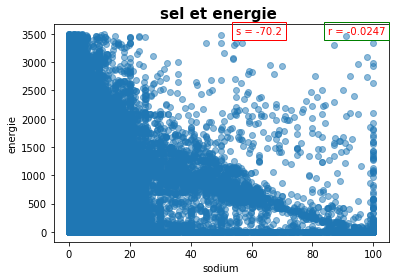

In [16]:
#sodium, energie et indicateurs de dispersion
plt.plot(df["salt_100g"],df["energy_100g"],'o',alpha=0.5)
plt.xlabel("sodium")
plt.ylabel("energie")
plt.title("sel et energie ", 
          weight='bold', 
          fontsize=15)
r=st.pearsonr(df["salt_100g"],df["energy_100g"])[0]
s=np.cov(df["salt_100g"],df["energy_100g"],ddof=0)[1,0]

plt.text(55, 3500, 's = {:.3}'.format(s), color='red', 
        bbox=dict(facecolor='none', edgecolor='red'))

plt.text(85,3500 , 'r = {:.3}'.format(r), color='red', 
        bbox=dict(facecolor='none', edgecolor='green'))

plt.show()

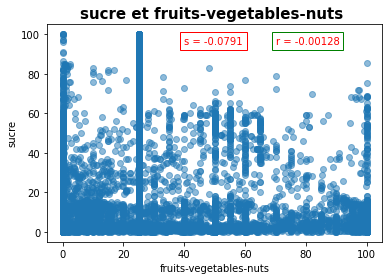

In [17]:
#Sucre, fruits-vegetables-nuts et indicateurs de dispersion
plt.plot(df["fruits-vegetables-nuts_100g"],df["sugars_100g"],'o',alpha=0.5)
plt.xlabel("fruits-vegetables-nuts")
plt.ylabel("sucre")
plt.title("sucre et fruits-vegetables-nuts ", 
          weight='bold', 
          fontsize=15)
r=st.pearsonr(df["fruits-vegetables-nuts_100g"],df["sugars_100g"])[0]
s=np.cov(df["fruits-vegetables-nuts_100g"],df["sugars_100g"],ddof=0)[1,0]

plt.text(40, 95, 's = {:.3}'.format(s), color='red', 
        bbox=dict(facecolor='none', edgecolor='red'))

plt.text(70, 95, 'r = {:.3}'.format(r), color='red', 
        bbox=dict(facecolor='none', edgecolor='green'))

plt.show()

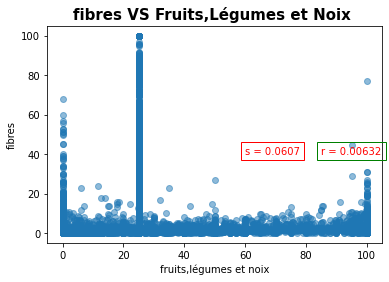

In [18]:
#fibres, fruits-legumes-noix et indicateurs de dispersion
plt.plot(df["fruits-vegetables-nuts_100g"],df["fiber_100g"],'o',alpha=0.5)
plt.xlabel("fruits,légumes et noix")
plt.ylabel("fibres")
plt.title("fibres VS Fruits,Légumes et Noix ", 
          weight='bold', 
          fontsize=15)
r=st.pearsonr(df["fruits-vegetables-nuts_100g"],df["fiber_100g"])[0]
s=np.cov(df["fruits-vegetables-nuts_100g"],df["fiber_100g"],ddof=0)[1,0]

plt.text(60, 40, 's = {:.3}'.format(s), color='red', 
        bbox=dict(facecolor='none', edgecolor='red'))

plt.text(85, 40, 'r = {:.3}'.format(r), color='red', 
        bbox=dict(facecolor='none', edgecolor='green'))

plt.show()

# la correlation

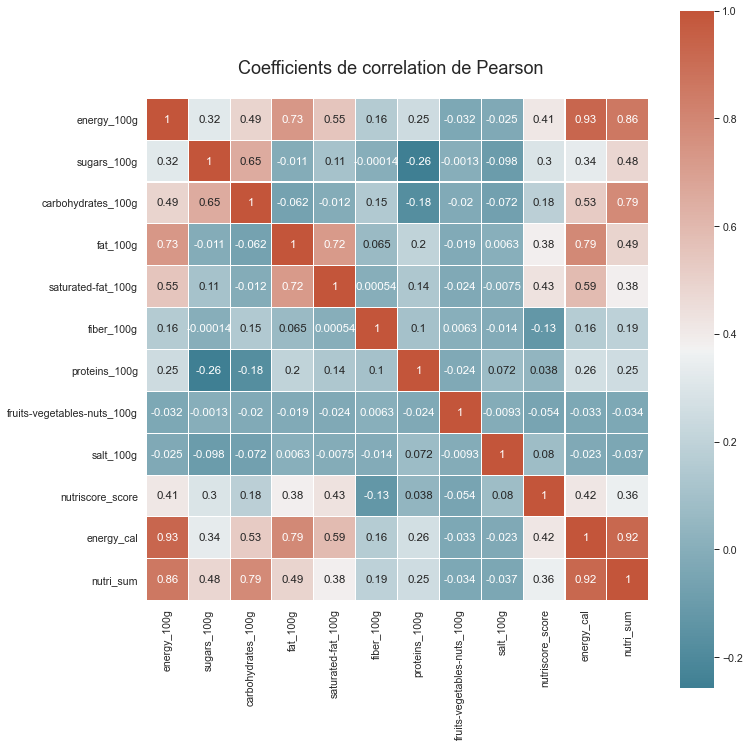

In [19]:

sns.set(context="paper", font_scale = 1.2)
corrmat = df.corr()
f, ax = plt.subplots(figsize=(11, 11))
f.text(0.50, 0.90, "Coefficients de correlation de Pearson", ha='center', fontsize = 18)
sns.heatmap(corrmat, square=True, linewidths=0.01, xticklabels=corrmat.columns, yticklabels=corrmat.columns,annot=True, cmap=sns.diverging_palette(220,20,as_cmap=True))
plt.tight_layout()

# Anova :la variable qualitative "nutriscore_grade" et variables quantitatives

In [20]:
#definition de la fonction de corrélation
def eta_squared(x,y):
    moyenne_y = y.mean()
    classes = []
    for classe in x.unique():
        yi_classe = y[x==classe]
        classes.append({'ni': len(yi_classe),
                        'moyenne_classe': yi_classe.mean()})
    SCT = sum([(yj-moyenne_y)**2 for yj in y])
    SCE = sum([c['ni']*(c['moyenne_classe']-moyenne_y)**2 for c in classes])
    return SCE/SCT


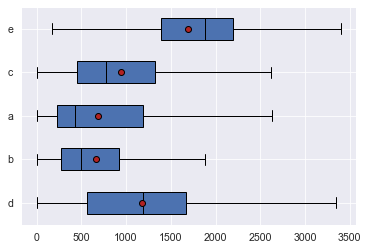

0.11517178046142382

In [21]:
X = "nutriscore_grade" # qualitative
Y = "energy_100g" # quantitative

modalites = df[X].unique()
groupes = []
for m in modalites:
         groupes.append(df[df[X]==m][Y])

# Propriétés graphiques (pas très importantes)    
medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}
    
plt.boxplot(groupes, labels=modalites, showfliers=False, medianprops=medianprops, 
            vert=False, patch_artist=True, showmeans=True, meanprops=meanprops)
plt.show()

eta_squared(df[X],df[Y])

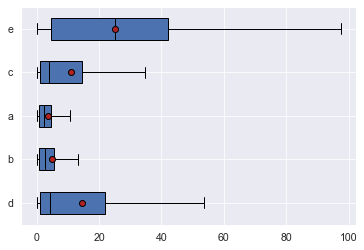

0.07075003032839365

In [22]:
X = "nutriscore_grade" # qualitative
Y = "sugars_100g" # quantitative



modalites = df[X].unique()
groupes = []
for m in modalites:
    groupes.append(df[df[X]==m][Y])

# Propriétés graphiques (pas très importantes)    
medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}
    
plt.boxplot(groupes, labels=modalites, showfliers=False, medianprops=medianprops, 
            vert=False, patch_artist=True, showmeans=True, meanprops=meanprops)
plt.show()
eta_squared(df[X],df[Y]) 

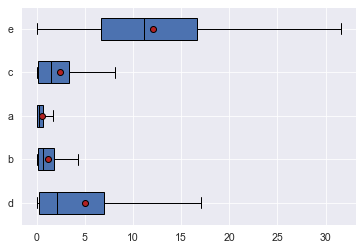

0.15717526728124448

In [23]:
X = "nutriscore_grade" # qualitative
Y = "saturated-fat_100g" # quantitative
modalites = df[X].unique()
groupes = []
for m in modalites:
    groupes.append(df[df[X]==m][Y])

# Propriétés graphiques (pas très importantes)    
medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}
    
plt.boxplot(groupes, labels=modalites, showfliers=False, medianprops=medianprops, 
            vert=False, patch_artist=True, showmeans=True, meanprops=meanprops)
plt.show()
 
eta_squared(df[X],df[Y])    

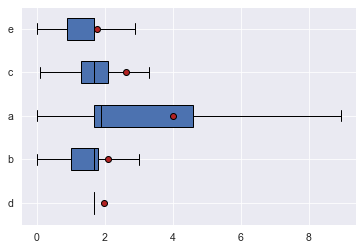

0.035212822540715165

In [24]:
X = "nutriscore_grade" # qualitative
Y = "fiber_100g" # quantitative
modalites = df[X].unique()
groupes = []
for m in modalites:
    groupes.append(df[df[X]==m][Y])

# Propriétés graphiques (pas très importantes)    
medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}
    
plt.boxplot(groupes, labels=modalites, showfliers=False, medianprops=medianprops, 
            vert=False, patch_artist=True, showmeans=True, meanprops=meanprops)
plt.show()

eta_squared(df[X],df[Y])

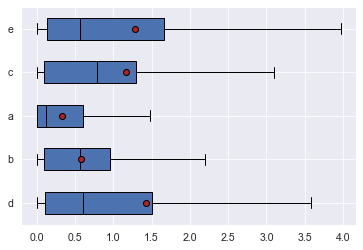

0.007579736496369106

In [25]:
X = "nutriscore_grade" # qualitative
Y = "salt_100g" # quantitative
modalites = df[X].unique()
groupes = []
for m in modalites:
    groupes.append(df[df[X]==m][Y])

# Propriétés graphiques (pas très importantes)    
medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}
    
plt.boxplot(groupes, labels=modalites, showfliers=False, medianprops=medianprops, 
            vert=False, patch_artist=True, showmeans=True, meanprops=meanprops)
plt.show()
 
eta_squared(df[X],df[Y])    

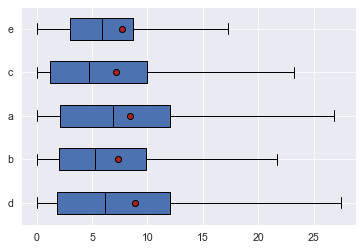

0.004564090887173375

In [26]:
X = "nutriscore_grade" # qualitative
Y = "proteins_100g" # quantitative
modalites = df[X].unique()
groupes = []
for m in modalites:
    groupes.append(df[df[X]==m][Y])

# Propriétés graphiques (pas très importantes)    
medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}
    
plt.boxplot(groupes, labels=modalites, showfliers=False, medianprops=medianprops, 
            vert=False, patch_artist=True, showmeans=True, meanprops=meanprops)
plt.show()

eta_squared(df[X],df[Y])

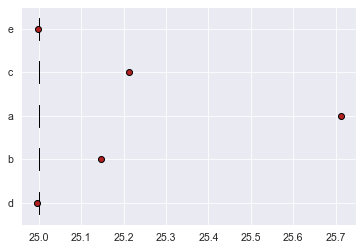

0.0034504131880233623

In [27]:
X = "nutriscore_grade" # qualitative
Y = "fruits-vegetables-nuts_100g" # quantitative
modalites = df[X].unique()
groupes = []
for m in modalites:
    groupes.append(df[df[X]==m][Y])

# Propriétés graphiques (pas très importantes)    
medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}
    
plt.boxplot(groupes, labels=modalites, showfliers=False, medianprops=medianprops, 
            vert=False, patch_artist=True, showmeans=True, meanprops=meanprops)
plt.show()

eta_squared(df[X],df[Y])

# ANOVA: la variable qualitative"pnns_groups_1 et  variables quantitatives

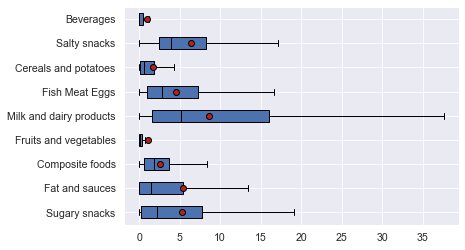

0.05402498514417847

In [28]:
# graisses saturée et categories
X = "pnns_groups_1" # qualitative
Y = "saturated-fat_100g" # quantitative
modalites = df[X].unique()
groupes = []
for m in modalites:
    groupes.append(df[df[X]==m][Y])

# Propriétés graphiques (pas très importantes)    
medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}
    
plt.boxplot(groupes, labels=modalites, showfliers=False, medianprops=medianprops, 
            vert=False, patch_artist=True, showmeans=True, meanprops=meanprops)
plt.show()
eta_squared(df[X],df[Y]) 

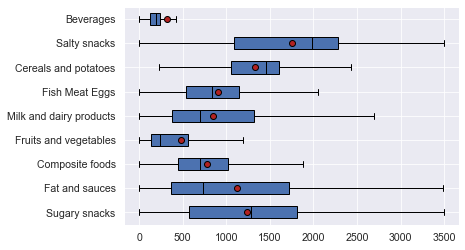

0.12361377247435087

In [29]:
#energies et categories
X = "pnns_groups_1" # qualitative
Y = "energy_100g" # quantitative
modalites = df[X].unique()
groupes = []
for m in modalites:
    groupes.append(df[df[X]==m][Y])

# Propriétés graphiques (pas très importantes)    
medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}
    
plt.boxplot(groupes, labels=modalites, showfliers=False, medianprops=medianprops, 
            vert=False, patch_artist=True, showmeans=True, meanprops=meanprops)
plt.show()
eta_squared(df[X],df[Y]) 

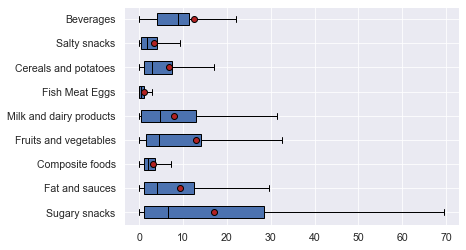

0.07861678909675529

In [30]:
#sucre et categories
X = "pnns_groups_1" # qualitative
Y = "sugars_100g" # quantitative
modalites = df[X].unique()
groupes = []
for m in modalites:
    groupes.append(df[df[X]==m][Y])

# Propriétés graphiques (pas très importantes)    
medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}
    
plt.boxplot(groupes, labels=modalites, showfliers=False, medianprops=medianprops, 
            vert=False, patch_artist=True, showmeans=True, meanprops=meanprops)
plt.show()
eta_squared(df[X],df[Y]) 

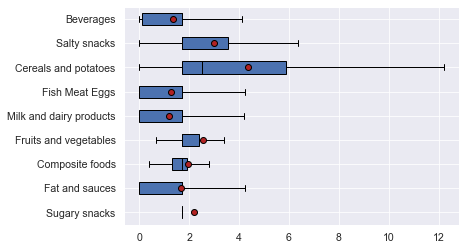

0.04635109698966966

In [31]:
#fibres et categories
X = "pnns_groups_1" # qualitative
Y = "fiber_100g" # quantitative
modalites = df[X].unique()
groupes = []
for m in modalites:
    groupes.append(df[df[X]==m][Y])

# Propriétés graphiques (pas très importantes)    
medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}
    
plt.boxplot(groupes, labels=modalites, showfliers=False, medianprops=medianprops, 
            vert=False, patch_artist=True, showmeans=True, meanprops=meanprops)
plt.show()
eta_squared(df[X],df[Y]) 

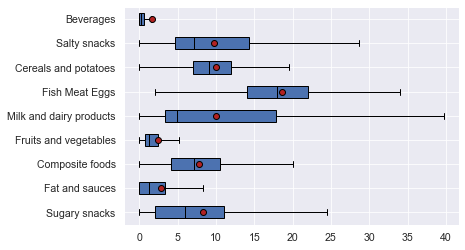

0.10674506220304232

In [32]:
#proteines et categories
X = "pnns_groups_1" # qualitative
Y = "proteins_100g" # quantitative
modalites = df[X].unique()
groupes = []
for m in modalites:
    groupes.append(df[df[X]==m][Y])

# Propriétés graphiques (pas très importantes)    
medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}
    
plt.boxplot(groupes, labels=modalites, showfliers=False, medianprops=medianprops, 
            vert=False, patch_artist=True, showmeans=True, meanprops=meanprops)
plt.show()
eta_squared(df[X],df[Y]) 

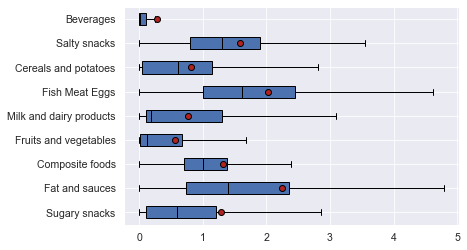

0.00986931349689583

In [33]:
#salt et categories
X = "pnns_groups_1" # qualitative
Y = "salt_100g" # quantitative
modalites = df[X].unique()
groupes = []
for m in modalites:
    groupes.append(df[df[X]==m][Y])

# Propriétés graphiques (pas très importantes)    
medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}
    
plt.boxplot(groupes, labels=modalites, showfliers=False, medianprops=medianprops, 
            vert=False, patch_artist=True, showmeans=True, meanprops=meanprops)
plt.show()
eta_squared(df[X],df[Y]) 

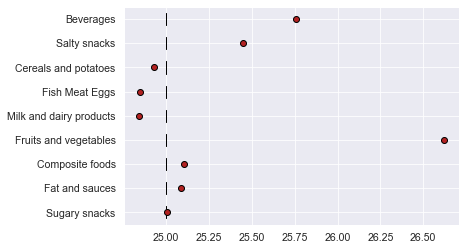

0.009773496385935363

In [34]:
#proteines et categories
X = "pnns_groups_1" # qualitative
Y = "fruits-vegetables-nuts_100g" # quantitative
modalites = df[X].unique()
groupes = []
for m in modalites:
    groupes.append(df[df[X]==m][Y])

# Propriétés graphiques (pas très importantes)    
medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}
    
plt.boxplot(groupes, labels=modalites, showfliers=False, medianprops=medianprops, 
            vert=False, patch_artist=True, showmeans=True, meanprops=meanprops)
plt.show()
eta_squared(df[X],df[Y]) 

# Variables Qualitatives: Chi-2

In [35]:
X = "nutriscore_grade"
Y = "pnns_groups_1"

cont = data[[X,Y]].pivot_table(index=X,columns=Y,aggfunc=len,margins=True,margins_name="Total")
cont

pnns_groups_1,Beverages,Cereals and potatoes,Composite foods,Fat and sauces,Fish Meat Eggs,Fruits and vegetables,Milk and dairy products,Salty snacks,Sugary snacks,Total
nutriscore_grade,,,,,,,,,,
a,1230,20156,6010,1950,6316,19008,5633,1281,10258,71842
b,4319,10433,11278,2863,7160,3978,8502,1848,12893,63274
c,6434,11438,13627,9692,9626,5074,11998,6552,31826,106267
d,13697,10447,10643,16567,17531,2326,21109,9752,557637,659709
e,11960,1474,1231,5842,10675,80,3538,3384,56677,94861
Total,37640,53948,42789,36914,51308,30466,50780,22817,669291,995953


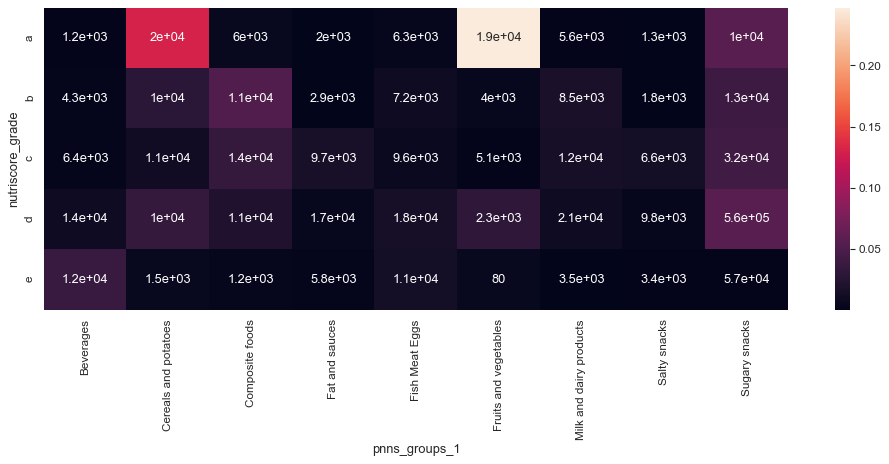

In [36]:
import seaborn as sns
fig = plt.figure(num=None, figsize=(15, 5), dpi=80, facecolor='w', edgecolor='k')

tx = cont.loc[:,["Total"]]
ty = cont.loc[["Total"],:]
n = len(data)
indep = tx.dot(ty) / n

c = cont.fillna(0) # On remplace les valeurs nulles par 0
measure = (c-indep)**2/indep
xi_n = measure.sum().sum()
table = measure/xi_n
sns.heatmap(table.iloc[:-1,:-1],annot=c.iloc[:-1,:-1])
plt.show()

# Analyse exploratoire

# ACP : 
#quelles sont les différences et les ressemblances entre individus?
#peunt on regroupées des variables en  nouvelles variables synthétiques ?

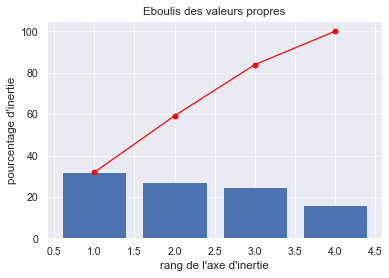

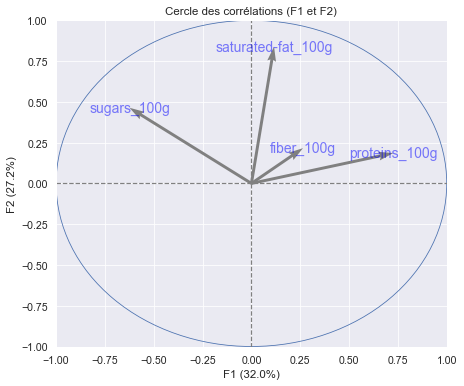

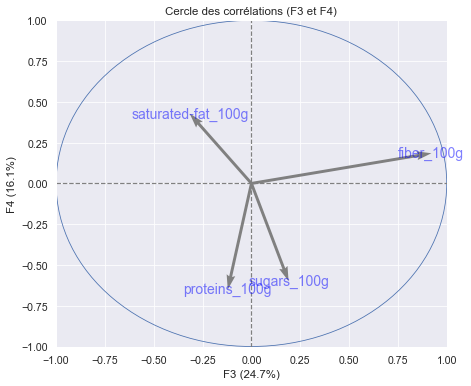

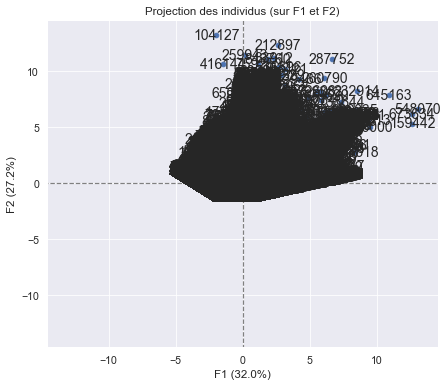

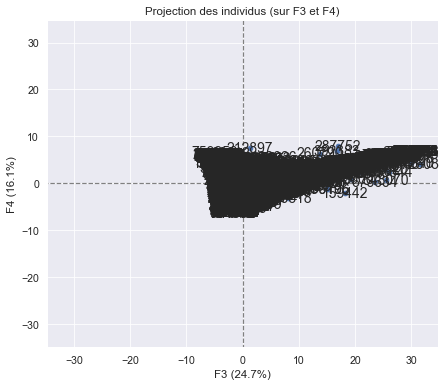

In [37]:
import pandas as pd
import numpy as np
from sklearn import decomposition
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

from functions import *

# choix du nombre de composantes à calculer
n_comp =4

# import de la dataset
data = pd.read_csv("data_new_to_analyse_median.csv")

# le dataset est enorme , on choisit un echantillon aleatoire
#chosen_idx = np.random.choice(20000, replace=False, size=5000)
#df_trimmed = data.iloc[chosen_idx]

# selection des colonnes à prendre en compte dans l'ACP
#data_pca =df_trimmed[["fat_100g","sugars_100g","proteins_100g", "fiber_100g","fruits-vegetables-nuts_100g"]]
data_pca =data[["saturated-fat_100g","sugars_100g", "proteins_100g", "fiber_100g", ]]



# préparation des données pour l'ACP
data_pca = data_pca.fillna(data_pca.mean()) # Il est fréquent de remplacer les valeurs inconnues par la moyenne de la variable
X = data_pca.values
names = data_pca.index # ou data.index pour avoir les intitulés
features = data_pca.columns

# Centrage et Réduction
std_scale = preprocessing.StandardScaler().fit(X)
X_scaled = std_scale.transform(X)

# Calcul des composantes principales
pca = decomposition.PCA(n_components=n_comp)
pca.fit(X_scaled)

# Eboulis des valeurs propres
display_scree_plot(pca)

# Cercle des corrélations
pcs = pca.components_
display_circles(pcs, n_comp, pca, [(0,1),(2,3),(4,5)], labels = np.array(features))

# Projection des individus
X_projected = pca.transform(X_scaled)
display_factorial_planes(X_projected, n_comp, pca, [(0,1),(2,3),(4,5)], labels = np.array(names))

plt.show()

In [38]:
pd.DataFrame(X_scaled, columns=data_pca.columns, index=data_pca.index)

,saturated-fat_100g,sugars_100g,proteins_100g,fiber_100g
0,-0.248846,0.064729,-0.067506,-0.161829
1,-0.373757,0.432993,-0.351327,-0.736750
2,-0.686033,-0.703366,-0.866409,-0.161829
3,-0.544089,-0.566582,-0.677195,-0.161829
4,-0.686033,0.091034,-0.866409,-0.161829
...,...,...,...,...
995948,0.165630,-0.177273,-0.109554,-0.161829
995949,-0.004703,0.538212,-0.614124,-0.161829
995950,-0.544089,-0.671800,-0.782314,-0.161829
995951,-0.686033,-0.692844,-0.719243,-0.161829


In [39]:
import pandas as pd
from sklearn import decomposition, preprocessing
X_scaled=preprocessing.StandardScaler().fit_transform(data_pca.values)
pca = decomposition.PCA(n_components=n_comp)
pca.fit(X_scaled)
X_projected = pca.transform(X_scaled)
pd.DataFrame(X_projected, index=data_pca.index, columns=["F" + str(i+1) for i in range(4)])

,F1,F2,F3,F4
0,-0.160978,-0.226263,-0.050007,-0.131340
1,-0.763204,-0.337416,-0.435894,-0.327223
2,-0.312424,-1.097882,0.038788,0.661633
3,-0.243940,-0.880171,-0.002964,0.517313
4,-0.808198,-0.729452,0.189948,0.185516
...,...,...,...,...
995948,0.007528,0.001308,-0.221926,0.218495
995949,-0.825146,0.096356,0.029182,0.045037
995950,-0.254612,-0.948537,-0.010248,0.648767
995951,-0.212118,-1.065609,0.022957,0.559578


In [40]:
f1=pca.components_[0]
print(f1)

[ 0.11583328 -0.62408727  0.72620008  0.26406661]


In [41]:
f2=pca.components_[1]
print(f2)

[0.83873365 0.46378445 0.18613721 0.21629331]


In [42]:
f3=pca.components_[2]
print(f3)

[-0.31597763  0.1902825  -0.12117702  0.92155675]


In [43]:
f4=pca.components_[3]
print(f4)

[ 0.42809655 -0.59934267 -0.65061703  0.18498429]


# clustering : k-means

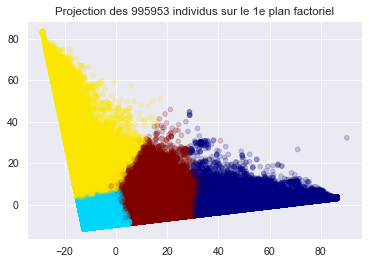

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import decomposition

# Nombre de clusters souhaités
n_clust = 4

# import de l'échantillon

data = pd.read_csv("data_new_to_analyse_median.csv")
#data=df
#data_pca =df_trimmed[["saturated-fat_100g", "fiber_100g", "sugars_100g", "proteins_100g", "energy_100g", "sodium_100g", "fruits-vegetables-nuts_100g", "pnns_groups_1"]]

# préparation des données pour le clustering
X = data_pca.values

# Centrage et Réduction
std_scale = preprocessing.StandardScaler().fit(X)
X_scaled = std_scale.transform(X)

# Clustering par K-means
km = KMeans(n_clusters=n_clust)
km.fit(X)

# Récupération des clusters attribués à chaque individu
clusters = km.labels_

# Affichage du clustering par projection des individus sur le premier plan factoriel
pca = decomposition.PCA(n_components=4).fit(X)
X_projected = pca.transform(X)
plt.scatter(X_projected[:, 0], X_projected[:, 1], c=clusters.astype(np.float), cmap = 'jet', alpha=.2)
plt.title("Projection des {} individus sur le 1e plan factoriel".format(X_projected.shape[0]))
plt.show(block=False)

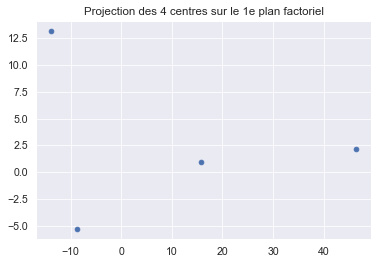

In [49]:
# Affichage des positions des centres de classes
plt.figure()
centroids = km.cluster_centers_
centroids_projected = pca.transform(centroids)
plt.scatter(centroids_projected[:,0],centroids_projected[:,1])
plt.title("Projection des {} centres sur le 1e plan factoriel".format(len(centroids)))
plt.show()

In [46]:
#Méthode de coude
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn import decomposition
#comment determiner le nombre de clusters
km.inertia_
inertia=[]
K_range =range(1,20)
for k in K_range:
    km=KMeans(n_clusters=k).fit(X)
    inertia.append(km.inertia_)

Text(0, 0.5, 'cout de model (Inertia)')

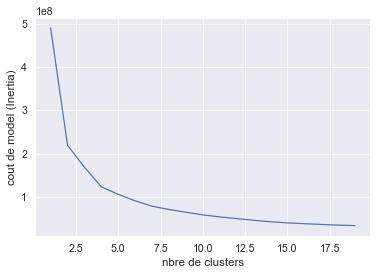

In [52]:
plt.plot(K_range, inertia)
plt.xlabel('nbre de clusters')
plt.ylabel('cout de model (Inertia)')